In [81]:
#necessary libraries
import pandas as pd
import numpy as np

In [82]:
#reading the dataset into a dataframe and showing first 5 rows
dataframe = pd.read_csv('corona_tested_individuals_ver_0083.english.csv', low_memory=False)
dataframe.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [83]:
#shape of the dataset
dataframe.shape

(2742596, 10)

In [84]:
#null values in the dataset
dataframe.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [85]:
#drop the null values
dataframe.dropna(inplace=True)

In [86]:
#null values in the dataset after dropping null values
dataframe.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [87]:
#shape of the dataset after dropping null values
dataframe.shape

(2186227, 10)

In [88]:
#dropping the date and age column
dataframe.drop('test_date', inplace=True, axis=1)
dataframe.drop('age_60_and_above', inplace=True, axis=1)
dataframe.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,negative,male,Other
1,0,1,0,0,0,negative,male,Other
2,0,0,0,0,0,negative,female,Other
3,0,0,0,0,0,negative,male,Other
4,0,1,0,0,0,negative,male,Contact with confirmed


In [89]:
#number of unique values in each column
dataframe.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
gender                 2
test_indication        3
dtype: int64

In [90]:
#unique values in each column
for col in dataframe:
    print(col, ': ', dataframe[col].unique())

cough :  [0 1]
fever :  [0 1]
sore_throat :  [0 1]
shortness_of_breath :  [0 1]
head_ache :  [0 1]
corona_result :  ['negative' 'positive' 'other']
gender :  ['male' 'female']
test_indication :  ['Other' 'Contact with confirmed' 'Abroad']


In [91]:
#dropping the rows with other corona results
dataframe = dataframe[dataframe.corona_result != 'other']
dataframe['corona_result'].value_counts()

negative    1943172
positive     208726
Name: corona_result, dtype: int64

In [92]:
#checking the final shape of the dataset
dataframe.shape

(2151898, 8)

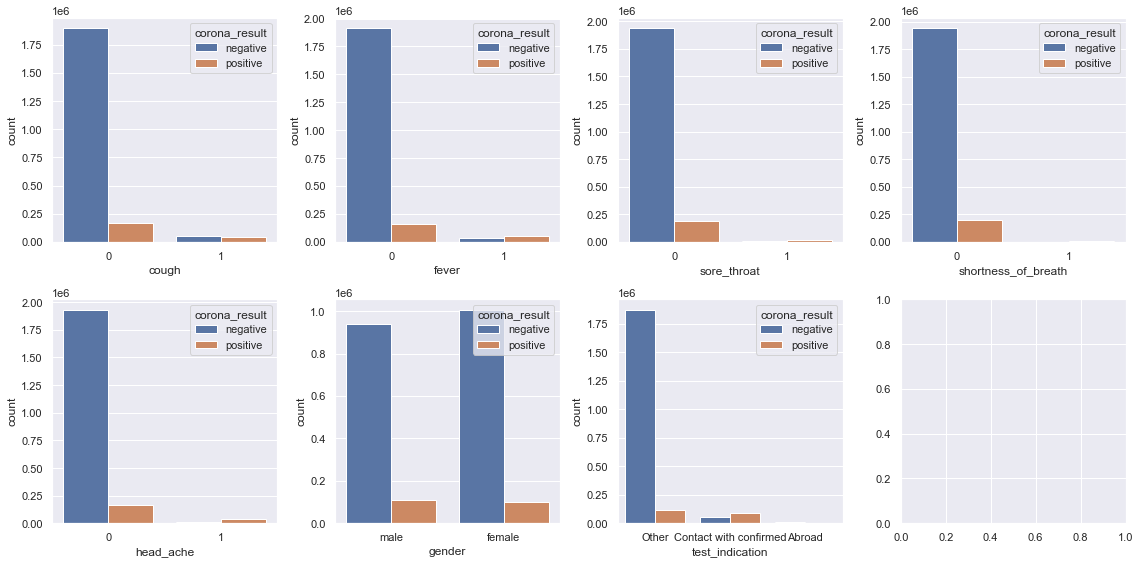

In [93]:
#corona_result in term of cough feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(2,4)
sns.countplot(x="cough", hue="corona_result", data=dataframe, ax=ax[0,0])
sns.countplot(x="fever", hue="corona_result", data=dataframe, ax=ax[0,1])
sns.countplot(x="sore_throat", hue="corona_result", data=dataframe, ax=ax[0,2])
sns.countplot(x="shortness_of_breath", hue="corona_result", data=dataframe, ax=ax[0,3])
sns.countplot(x="head_ache", hue="corona_result", data=dataframe, ax=ax[1,0])
#sns.countplot(x="age_60_and_above", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="gender", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="test_indication", hue="corona_result", data=dataframe, ax=ax[1,2])
plt.tight_layout()

In [94]:
#convreting the cetegorical values into numerical values
pd.options.mode.chained_assignment = None
dataframe['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)
#dataframe['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)
dataframe['gender'].replace(['male', 'female'], [1, 0], inplace=True)
dataframe['test_indication'].replace(['Other', 'Contact with confirmed', 'Abroad'], [0, 1, 2], inplace=True)

dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,1


<AxesSubplot:>

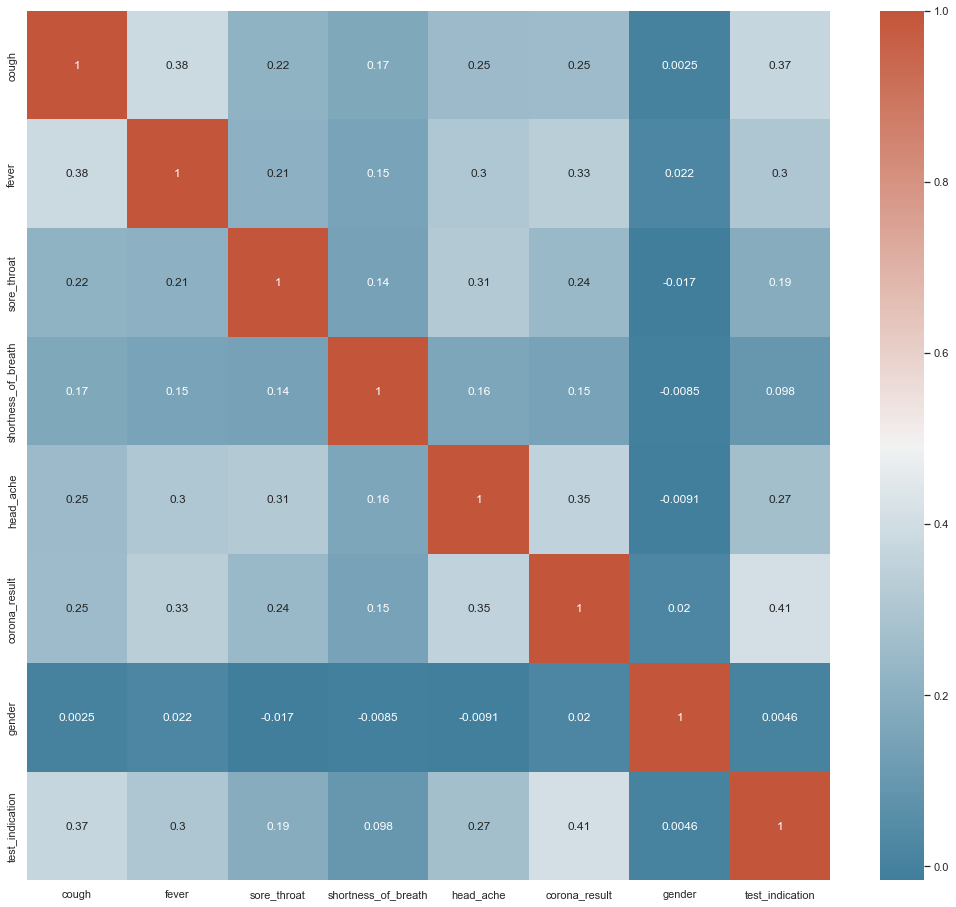

In [95]:
#ploting a heatmap showing the coorelation
plt.figure(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataframe.corr(), cmap=cmap, annot=True)

# Model Training

### Spliting data into test and train set

In [96]:
#features
X = dataframe.drop('corona_result',axis=1)

#target variable
y = dataframe['corona_result']

In [97]:
#count of positive and negative case in the dataset
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 1943172, 1: 208726})


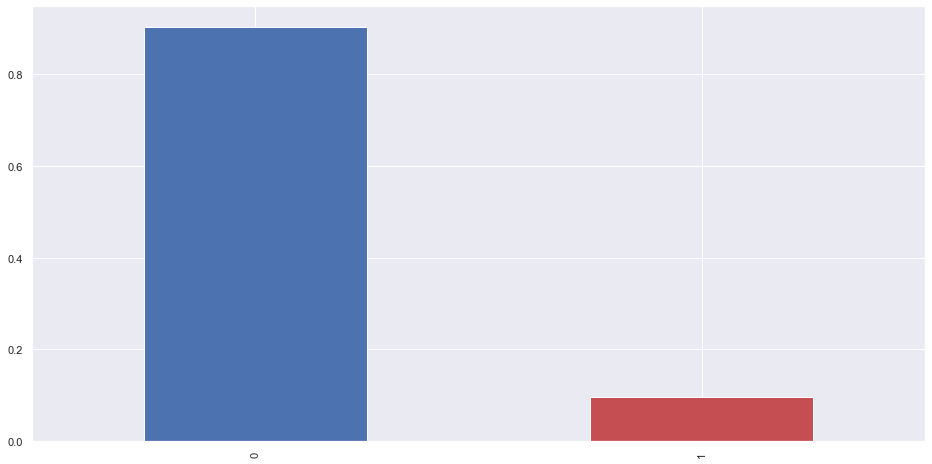

In [98]:
#plot it for a better visualization
class_distribution = pd.Series(y).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [99]:
#splitting the data into 75% train data and 25% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## SMOTE - Oversampling Data

In [100]:
#oversampling data to balance it
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train)

print('Oversampled dataset shape %s' % Counter(y_res))

Oversampled dataset shape Counter({0: 1457216, 1: 1457216})


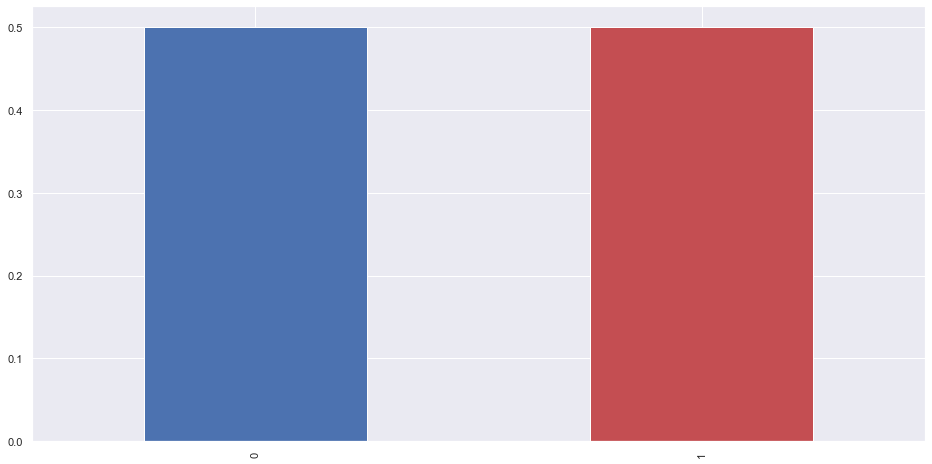

In [101]:
#plot it for a better visualization
class_distribution = pd.Series(y_res).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [102]:
X_train = X_res
y_train = y_res

In [103]:
#number of training data
X_train.shape

(2914432, 7)

In [104]:
#number of test data
X_test.shape

(537975, 7)

### Logistic Regression Model

In [105]:
#necessary library
from sklearn.linear_model import LogisticRegression

In [106]:
#training the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [107]:
#prediction on test data
predictions = log_model.predict(X_test)

In [108]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [109]:
#model's accurary score
log_model.score(X_test, y_test)

0.9202026116455225

In [110]:
#save the model
import pickle

#filename = 'LogisticRegression_model.sav'
#pickle.dump(log_model, open(filename, 'wb'))

#### Evaluating logistic regression model

In [111]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [112]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.58      0.64      0.61     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.78    537975
weighted avg       0.92      0.92      0.92    537975



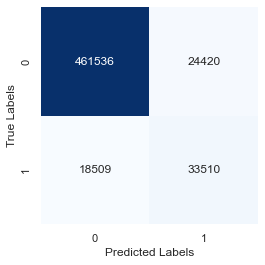

In [113]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()


In [114]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07979738835447744

In [115]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07979738835447744

In [116]:
#r2 Score
r2_score(y_test, predictions)

0.08640457008113467

### Decision Tree Model

In [117]:
#finding optimum depth for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = []
for i in range(1, 10):
    d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=i)
    d_tree.fit(X_train, y_train)
    y_predict = d_tree.predict(X_test)
    depth.append(accuracy_score(y_test, y_predict))
    print('Depth= ', i, ": ", accuracy_score(y_test, y_predict))

Depth=  1 :  0.9151466146196384
Depth=  2 :  0.9182768716018402
Depth=  3 :  0.9272178075189368
Depth=  4 :  0.9211078581718481
Depth=  5 :  0.9215985872949487
Depth=  6 :  0.9218067754077792
Depth=  7 :  0.9218067754077792
Depth=  8 :  0.9219573400250941
Depth=  9 :  0.9219573400250941


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


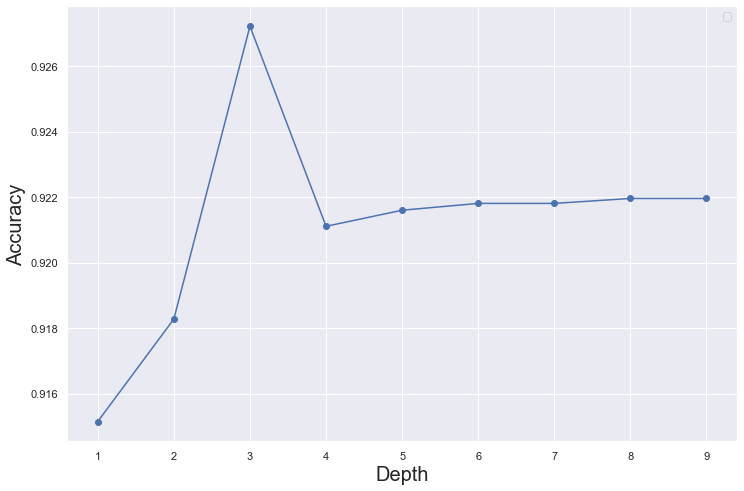

In [118]:
#ploting the accuracies for different tree depth
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), depth, marker='o')
plt.xlabel('Depth', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 10))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [119]:
#making model with depth=7 for prediction
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=100)

In [120]:
#prediction on test data
predictions = d_tree.predict(X_test)

In [121]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [122]:
#model's accurary score
d_tree.score(X_test, y_test)

0.9218067754077792

In [123]:
#save the model
import pickle

#filename = 'DecisionTree_model.sav'
#pickle.dump(d_tree, open(filename, 'wb'))

#### Evaluating Decision Tree model

In [124]:
#classification report for Decision Tree
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



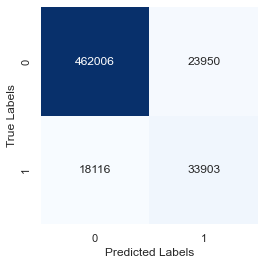

In [125]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [126]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07819322459222083

In [127]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07819322459222083

In [128]:
#r2 Score
r2_score(y_test, predictions)

0.10477054310682787

### Random Forest Model

In [129]:
#creating model and making predicton
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [130]:
#prediction on test data
predictions = r_forest.predict(X_test)


In [131]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [132]:
#model's accurary score
r_forest.score(X_test, y_test)

0.9219573400250941

In [133]:
#save the model

filename = 'RandomForest_model.sav'
#pickle.dump(r_forest, open(filename, 'wb'))

#### Evaluating Random Forest model

In [134]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



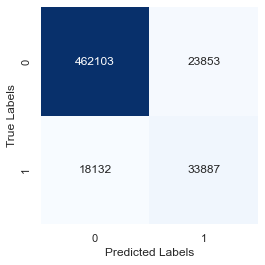

In [135]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [136]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07804265997490589

In [137]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07804265997490589

In [138]:
#r2 Score
r2_score(y_test, predictions)

0.10649434822279669

### KNN Model

Creating a smaller subset of test data for KNN

In [139]:
d_X_test = X_test.head(10000)
#d_X_test.value_counts()

In [140]:
d_y_test = y_test.head(10000)
d_y_test.value_counts()

0    9062
1     938
Name: corona_result, dtype: int64

Training the model

In [141]:
#necessary library
from sklearn.neighbors import KNeighborsClassifier

In [142]:
#making model with k=25 for prediction
KNN = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [143]:
#prediction on test data
predictions = KNN.predict(d_X_test)

In [144]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': d_y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
702896,0,0
683427,0,1
381138,0,0
1147284,0,0


In [145]:
#model's accurary score
KNN.score(d_X_test, d_y_test)

0.9216

In [146]:
#save the model

filename = 'KNN_model.sav'
#pickle.dump(KNN, open(filename, 'wb'))

#### Evaluating KNN model

In [147]:
#Classification Report

print(classification_report(d_y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96      9062
    Positive       0.63      0.39      0.48       938

    accuracy                           0.92     10000
   macro avg       0.79      0.68      0.72     10000
weighted avg       0.91      0.92      0.91     10000



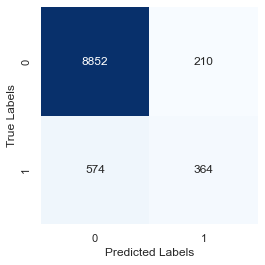

In [148]:
#confusion matrix

cm = confusion_matrix(d_y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [149]:
#mean squared error
mean_squared_error(d_y_test, predictions)

0.0784

In [150]:
#mean absolute error
mean_absolute_error(d_y_test, predictions)

0.0784

In [151]:
#r2 Score
r2_score(d_y_test, predictions)

0.07766398640213201

### Model Performance Comparison

ROC & DET Curve

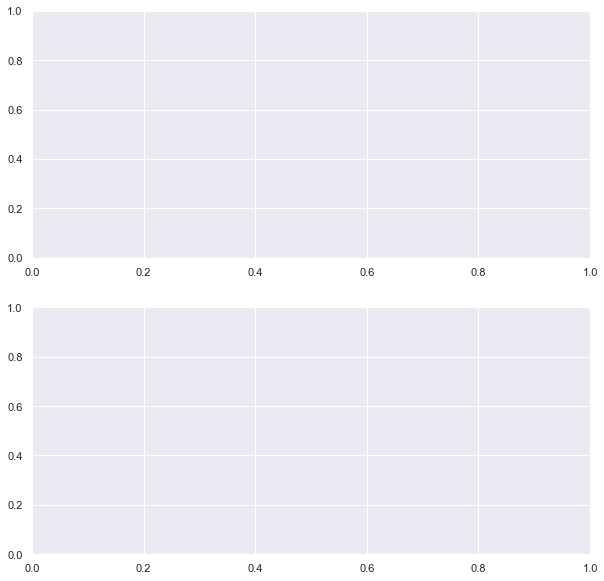

In [152]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

#N_SAMPLES = 1000

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7),
    "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=25, n_jobs=-1),
}


# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(2, 1, figsize=(10, 10))

# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)

#     RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
#     DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

# ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
# ax_det.set_title("Detection Error Tradeoff (DET) curves")

# ax_roc.grid(linestyle="--")
# ax_det.grid(linestyle="--")

# plt.legend()
# plt.show()

In [153]:
models_scores_table = pd.DataFrame({'Logistic Regression':[.8091, 0.83, 0.81, 0.80, 0.76, 0.92],
                                    'Decision Tree':[0.8167, 0.83, 0.82, 0.81, 0.77, 0.91],
                                    'Random Forest':[0.8167, 0.83, 0.82, 0.81, 0.77, 0.91],
                                    'KNN':[0.8166, 0.83, 0.82, 0.81, 0.77, 0.91]},
                                    index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Negative Precision', 'Positive Precision'])

In [154]:
models_scores_table

,Logistic Regression,Decision Tree,Random Forest,KNN
Accuracy,0.8091,0.8167,0.8167,0.8166
Precision,0.8300,0.8300,0.8300,0.8300
Recall,0.8100,0.8200,0.8200,0.8200
F1 Score,0.8000,0.8100,0.8100,0.8100
Negative Precision,0.7600,0.7700,0.7700,0.7700
Positive Precision,0.9200,0.9100,0.9100,0.9100


In [155]:
best_scores = models_scores_table
best_scores['Best Score'] = models_scores_table.idxmax(axis=1)
best_scores

,Logistic Regression,Decision Tree,Random Forest,KNN,Best Score
Accuracy,0.8091,0.8167,0.8167,0.8166,Decision Tree
Precision,0.8300,0.8300,0.8300,0.8300,Logistic Regression
Recall,0.8100,0.8200,0.8200,0.8200,Decision Tree
F1 Score,0.8000,0.8100,0.8100,0.8100,Decision Tree
Negative Precision,0.7600,0.7700,0.7700,0.7700,Decision Tree
Positive Precision,0.9200,0.9100,0.9100,0.9100,Logistic Regression


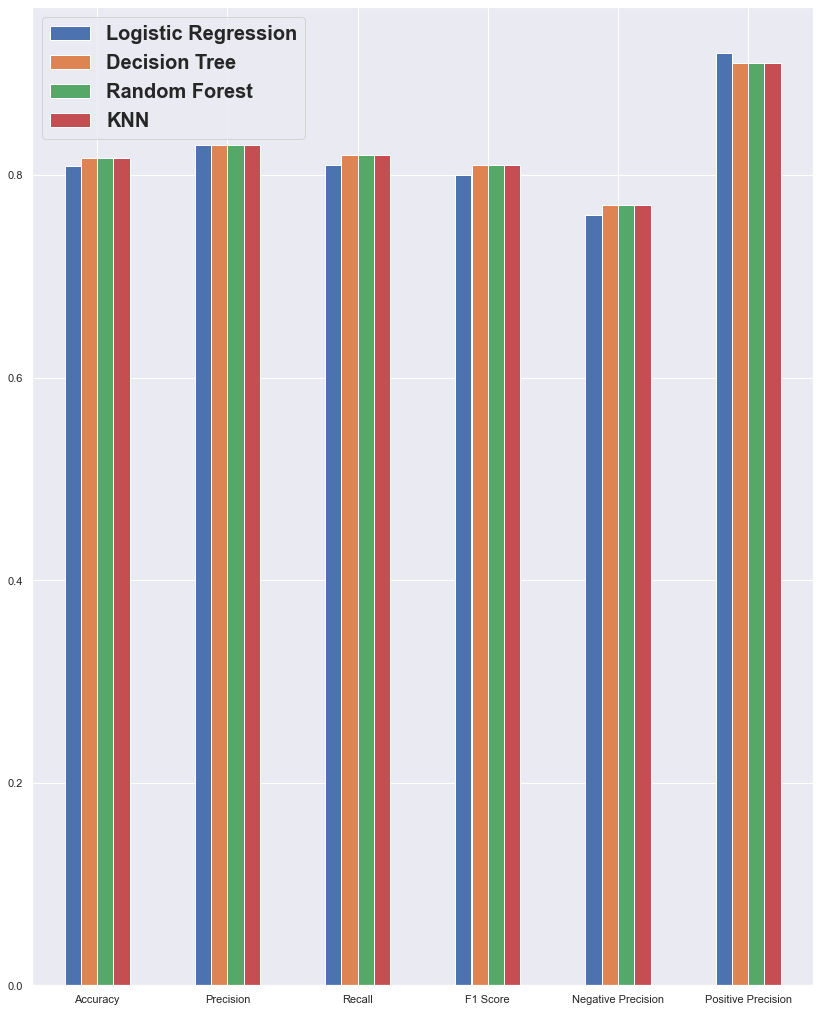

In [156]:
ax = models_scores_table.plot.bar(rot=0, figsize=(14,18))
legend_prop = {'weight':'bold', 'size': 20}
plt.legend(prop=legend_prop)
plt.show()

# Training ANN Model

### Creating the model

In [157]:
#necessary library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [158]:
X_train.shape

(2914432, 7)

In [159]:
model = Sequential()

# input layer
model.add(Dense(60,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [160]:
#training the model
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
91076/91076 [==============================] - 87s 927us/step - loss: 0.4621 - val_loss: 0.4244
Epoch 2/25
91076/91076 [==============================] - 86s 944us/step - loss: 0.4612 - val_loss: 0.4133
Epoch 3/25
91076/91076 [==============================] - 86s 943us/step - loss: 0.4611 - val_loss: 0.4119
Epoch 4/25
91076/91076 [==============================] - 86s 943us/step - loss: 0.4610 - val_loss: 0.4257
Epoch 5/25
91076/91076 [==============================] - 81s 886us/step - loss: 0.4611 - val_loss: 0.4170
Epoch 6/25
91076/91076 [==============================] - 80s 884us/step - loss: 0.4610 - val_loss: 0.4337
Epoch 7/25
91076/91076 [==============================] - 81s 885us/step - loss: 0.4610 - val_loss: 0.4094
Epoch 8/25
91076/91076 [==============================] - 83s 916us/step - loss: 0.4610 - val_loss: 0.4347
Epoch 9/25
91076/91076 [==============================] - 81s 886us/step - loss: 0.4610 - val_loss: 0.4105
Epoch 10/25
91076/91076 [============

### Saving the model

In [161]:
#necessary library
from tensorflow.keras.models import load_model

#model.save('ANN_model.h5')  

### Evaluating the ANN Model

<AxesSubplot:>

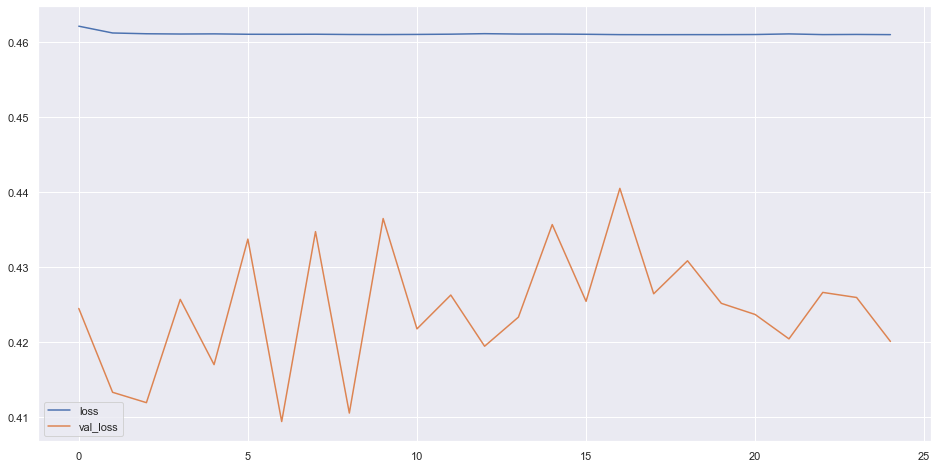

In [162]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [163]:
#predicting using ANN model
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test) 
predictions = np.argmax(predictions, axis=1)

In [164]:
print(classification_report(y_test,predictions))

D:\Programs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    485956
           1       0.00      0.00      0.00     52019

    accuracy                           0.90    537975
   macro avg       0.45      0.50      0.47    537975
weighted avg       0.82      0.90      0.86    537975



D:\Programs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


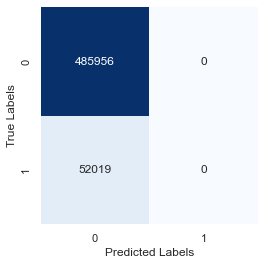

In [165]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [166]:
#mean squared error
mean_squared_error(y_test, predictions)

0.09669408429759747

In [167]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.09669408429759747

In [168]:
#r2 Score
r2_score(y_test, predictions)

-0.10704467071092871

### SVM Model - Linear Kernel

In [169]:
from sklearn import svm

In [170]:
# model = svm.SVC(kernel='linear') # Linear Kernel
# model.fit(X_train, y_train)

In [171]:
#selecting a subset of dataset
X_train_x = X_train.iloc[:20000]
y_train_y = y_train.iloc[:20000]

In [172]:
model = svm.SVC(kernel='linear') # Linear Kernel

model.fit(X_train_x, y_train_y)

SVC(kernel='linear')

In [173]:
#prediction on test data
predictions = model.predict(X_test)

In [174]:
#model's accurary score
model.score(X_test, y_test)

0.9197323295692179

In [175]:
#save the model

filename = 'SVM_linear_model.sav'
#pickle.dump(model, open(filename, 'wb'))

#### Evaluating SVM linear-kernel model

In [176]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.93      0.99      0.96    485956
    Positive       0.75      0.26      0.38     52019

    accuracy                           0.92    537975
   macro avg       0.84      0.62      0.67    537975
weighted avg       0.91      0.92      0.90    537975



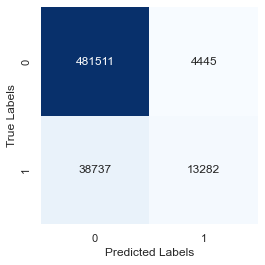

In [177]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [178]:
#mean squared error
mean_squared_error(y_test, predictions)

0.0802676704307821

In [179]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.0802676704307821

In [180]:
#r2 Score
r2_score(y_test, predictions)

0.08102033928681218

### SVM Model - RBF Kernel

In [181]:
model = svm.SVC(kernel='rbf')

model.fit(X_train_x, y_train_y)

SVC()

In [182]:
#prediction on test data
predictions = model.predict(X_test)

In [183]:
#model's accurary score
model.score(X_test, y_test)

0.9291435475626191

In [184]:
#save the model
filename = 'SVM_rbf_model.sav'
pickle.dump(model, open(filename, 'wb'))

#### Evaluating SVM rbf-kernel model

In [185]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96    485956
    Positive       0.65      0.57      0.61     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.77      0.79    537975
weighted avg       0.93      0.93      0.93    537975



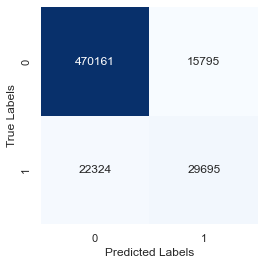

In [186]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [187]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07085645243738092

In [188]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07085645243738092

In [189]:
#r2 Score
r2_score(y_test, predictions)

0.18876879980718797

#### SVM Model polynomial-kernel 

In [190]:
#finding optimum degree for svm polynomial kernel
degree = []
for i in range(1, 6):
    svm_model = svm.SVC(kernel='poly', degree=i)
    svm_model.fit(X_train_x, y_train_y)
    y_predict = svm_model.predict(X_test)
    degree.append(accuracy_score(y_test, y_predict))
    print('Degree= ', i, ": ", accuracy_score(y_test, y_predict))

Degree=  1 :  0.9197323295692179
Degree=  2 :  0.9213476462660904
Degree=  3 :  0.9245262326316278
Degree=  4 :  0.926063478786189
Degree=  5 :  0.9257883730656629


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


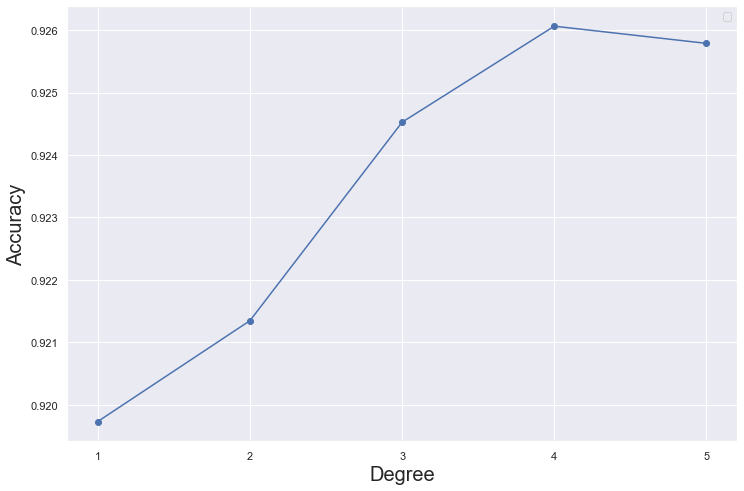

In [191]:
#ploting the accuracies for different degree
plt.figure(figsize=(12, 8))
plt.plot(range(1, 6), degree, marker='o')
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 6))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [192]:
#training model with degree=4
model = svm.SVC(kernel='poly', degree=4)

model.fit(X_train_x, y_train_y)

SVC(degree=4, kernel='poly')

In [193]:
#prediction on test data
predictions = model.predict(X_test)

In [194]:
#model's accurary score
model.score(X_test, y_test)

0.926063478786189

In [195]:
#save the model
filename = 'SVM_polynomial_model.sav'
pickle.dump(model, open(filename, 'wb'))

#### Evaluating SVM polynomial-kernel model

In [196]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96    485956
    Positive       0.67      0.47      0.55     52019

    accuracy                           0.93    537975
   macro avg       0.81      0.72      0.76    537975
weighted avg       0.92      0.93      0.92    537975



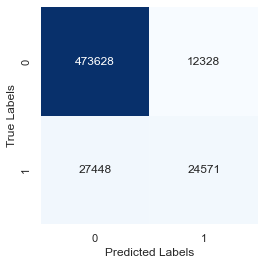

In [197]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [198]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07393652121381106

In [199]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07393652121381106

In [200]:
#r2 Score
r2_score(y_test, predictions)

0.15350528033607147

### Tuning the hyper-parameters

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}

In [203]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_x,y_train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.6s
[CV] END ......................C=0.1, gamma=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [204]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [205]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[469443  16513]
 [ 21325  30694]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    485956
           1       0.65      0.59      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.78      0.79    537975
weighted avg       0.93      0.93      0.93    537975



#### Linear Regression Model

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [208]:
#predictions = model.predict(X_test)
predictions = np.round(np.clip(model.predict(X_test), 0, 1)).astype(int)

In [209]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [210]:
model.score(X_test, y_test)

-0.668198313274728

## Ensemble Learning

### Voting Classifier

In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [212]:
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
clf3 = RandomForestClassifier(random_state=0) 

In [213]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3)], voting='hard')

In [214]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.00) [Logistic Regression]
Accuracy: 0.80 (+/- 0.00) [Decision Tree]
Accuracy: 0.80 (+/- 0.00) [Random Forest]
Accuracy: 0.80 (+/- 0.00) [Ensemble]


In [215]:
eclf.fit(X_train, y_train)
eclf_predictions = eclf.predict(X_test)
print(classification_report(y_test,eclf_predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    485956
           1       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



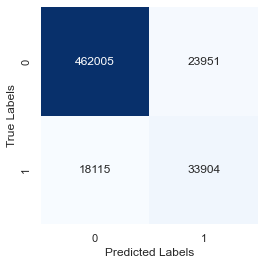

In [216]:
#confusion matrix
cm = confusion_matrix(y_test, eclf_predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()